In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Flatten, Dropout, Activation, MaxPooling2D, AveragePooling2D, BatchNormalization
from keras.utils import to_categorical
from keras import regularizers

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
assert tf.test.is_built_with_cuda()
assert tf.config.list_physical_devices('GPU')

In [17]:
TRAINING_DIR = "resource/first/train/"
VALIDATION_DIR = "resource/first/val/"

BATCH_SIZE = 16

training_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR, 
    target_size=(226,226), 
    color_mode='rgb',
    shuffle=True,
    class_mode="categorical",
    batch_size=BATCH_SIZE)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR, 
    target_size=(226,226), 
    color_mode='rgb',
    shuffle=True,
    class_mode="categorical",
    batch_size=BATCH_SIZE)

Found 112 images belonging to 11 classes.
Found 54 images belonging to 11 classes.


In [5]:
from collections import Counter

counter = Counter(train_generator.classes)

numberClasses = len(counter.items())
print(counter.items())
print(numberClasses)

dict_items([(0, 10), (1, 6), (2, 12), (3, 9), (4, 12), (5, 5), (6, 8), (7, 5), (8, 12), (9, 6), (10, 27)])
11


In [6]:
# Base on VGG16 but no 5th Conv layer and Dense drop to 2048 because limit memory
model = Sequential()

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu', input_shape=(226,226,3)))
model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu'))
model.add(Dense(numberClasses, activation='softmax'))

epochs = 1000
lrate = 0.00001
decay = lrate/epochs
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lrate), 
              loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 226, 226, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 226, 226, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 113, 113, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 113, 113, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 113, 113, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 113, 113, 128)     147584    
                                                        

In [7]:
callbacks = [
    # tf.keras.callbacks.EarlyStopping(patience=10),
    tf.keras.callbacks.ModelCheckpoint(filepath='FaceClassify_REMASTER_2.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

# hist = model.fit(x=train_generator, validation_data=validation_generator, epochs=20, batch_size=BATCH_SIZE, verbose=1, callbacks=callbacks)
hist = model.fit(x=train_generator, validation_data=validation_generator, epochs=epochs, batch_size=BATCH_SIZE, callbacks=callbacks)

Epoch 1/1000
7/7 [==============================] - 14s 843ms/step - loss: 2.3950 - accuracy: 0.1607 - val_loss: 2.3945 - val_accuracy: 0.2963
Epoch 2/1000
7/7 [==============================] - 4s 568ms/step - loss: 2.3808 - accuracy: 0.2411 - val_loss: 2.3899 - val_accuracy: 0.2963
Epoch 3/1000
7/7 [==============================] - 4s 563ms/step - loss: 2.3591 - accuracy: 0.2411 - val_loss: 2.3796 - val_accuracy: 0.2963
Epoch 4/1000
7/7 [==============================] - 4s 587ms/step - loss: 2.3288 - accuracy: 0.2411 - val_loss: 2.3534 - val_accuracy: 0.2963
Epoch 5/1000
7/7 [==============================] - 4s 565ms/step - loss: 2.2825 - accuracy: 0.2411 - val_loss: 2.3206 - val_accuracy: 0.2963
Epoch 6/1000
7/7 [==============================] - 4s 568ms/step - loss: 2.2622 - accuracy: 0.2411 - val_loss: 2.3073 - val_accuracy: 0.2963
Epoch 7/1000
7/7 [==============================] - 4s 569ms/step - loss: 2.2486 - accuracy: 0.2411 - val_loss: 2.3162 - val_accuracy: 0.2963
Epoch

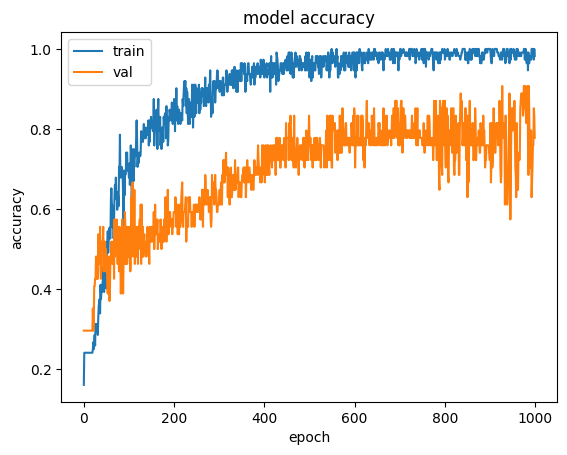

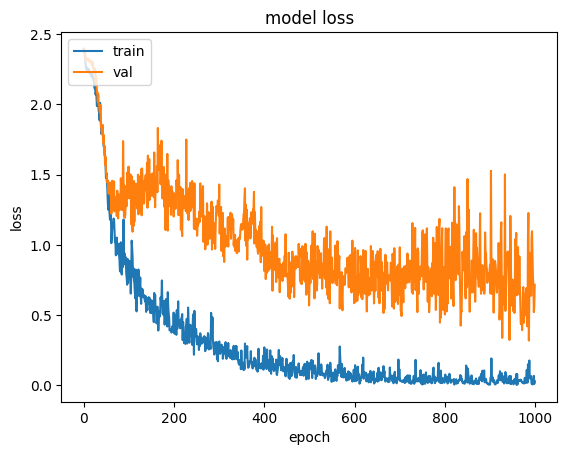

In [8]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.savefig('accuracy.png')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.savefig('loss.png')
plt.show()

In [9]:
img, label = validation_generator.next()
predi = model.predict(img)
# plt.imshow(img[5,:,:,:])
# plt.show()
label = np.argmax(label, axis=1)
# for i in range(0,BATCH_SIZE):
#     print("Right answer: {}\nPredict: {}".format(label[i], np.argmax(predi[i])))
print(np.argmax(predi[0]) == label[0])
# i = 0
# right = 0
# false = 0
# while i < 100:
#     img, label = validation_generator.next()
#     predi = model.predict(img)
#     for j in range(0,7):
#         if label[j] == np.argmax(predi[j]):
#             right += 1
#         else:
#             false += 1
#     i += 1
# print("RIGHT: {} \nFALSE: {}".format(right, false))

1/1 [==============================] - 0s 238ms/step
True


In [20]:
import keras.models
model = tf.keras.models.load_model('FaceClassify_REMASTER_2.h5', compile=False)

In [14]:
best_model_accuracy = hist.history['accuracy'][np.argmin(hist.history['loss'])]
print(best_model_accuracy)
best_model_val_accuracy = hist.history['val_accuracy'][np.argmin(hist.history['val_loss'])]
print(best_model_val_accuracy)
print(np.min(hist.history['val_loss']))

1.0
0.9074074029922485
0.31794849038124084


In [81]:
img, label = validation_generator.next()
predi = model.predict([img])
label = np.argmax(label, axis=1)
print(np.argmax(predi[0]) == label[0])

1/1 [==============================] - 0s 26ms/step
True
